# Stock Data, Machine Learning, and Neural Networks

In this notebook, we will be using the cleaned csv file that you obtained from the Stock_api.ipynb notebook to model the data. In this case, we will be using the GOOG.csv file to run machine learning models on. 

In [201]:
#Importing the basic modules.
import pandas as pd 
import numpy as np

In [12]:
#Import the cleaned dataset from our Stock_api notebook and using the date as the index
data = pd.read_csv('C:/Users/linwi/Documents/Stock_test/Cleaned_Dataset/GOOG.csv',index_col = 0)

In [13]:
#Check
data.head()

,open,high,low,close,adjusted close,volume
2024-04-01,151.650,156.990,151.65,156.50,156.50,24413368
2024-03-28,152.000,152.670,151.33,152.26,152.26,21105628
2024-03-27,152.145,152.690,150.13,151.94,151.94,16621964
2024-03-26,151.240,153.200,151.03,151.70,151.70,19312694
2024-03-25,150.950,151.456,148.80,151.15,151.15,15114728


In [14]:
#Check the information of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2520 entries, 2024-04-01 to 2014-03-27
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   open            2520 non-null   float64
 1   high            2520 non-null   float64
 2   low             2520 non-null   float64
 3   close           2520 non-null   float64
 4   adjusted close  2520 non-null   float64
 5   volume          2520 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.8+ KB


In [16]:
#Changng the datatype of the index to date time.
data.index = pd.to_datetime(data.index)

In [17]:
#check 
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2520 entries, 2024-04-01 to 2014-03-27
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   open            2520 non-null   float64
 1   high            2520 non-null   float64
 2   low             2520 non-null   float64
 3   close           2520 non-null   float64
 4   adjusted close  2520 non-null   float64
 5   volume          2520 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.8 KB


## Modeling,Visualizations, and Evaluations

### Preprocessing and Feature Engineering

Our target will be whether the stock will go up or down. We will be creating new columns to help with the modeling.

In [36]:
#Create a new column for called tomorrow. This gives us the adjusted close price for the next day.
data['Tomorrow_Adj_close'] = data["adjusted close"].shift(1)

In [37]:
#Check
data

,open,high,low,close,adjusted close,volume,Tomorrow_Adj_close
2024-04-01,151.650,156.990,151.65,156.50,156.5000,24413368,NaN
2024-03-28,152.000,152.670,151.33,152.26,152.2600,21105628,156.5000
2024-03-27,152.145,152.690,150.13,151.94,151.9400,16621964,152.2600
2024-03-26,151.240,153.200,151.03,151.70,151.7000,19312694,151.9400
2024-03-25,150.950,151.456,148.80,151.15,151.1500,15114728,151.7000
...,...,...,...,...,...,...,...
2014-04-02,565.106,604.830,562.19,567.00,28.3500,146700,28.4870
2014-04-01,558.710,568.450,558.71,567.16,28.3580,7900,28.3500
2014-03-31,566.890,567.000,556.93,556.97,27.8485,10800,28.3580
2014-03-28,561.200,566.430,558.67,559.99,27.9995,41100,27.8485


We will be getting rid of the `close` column as it doesn't adjust for stock splits.

In [47]:
del data['close']

Create another column called `Target` to see if `Tomorrow_Adj_close` price is greater than present day's `Close` price. We may use the target column later to predict the direction that the stock will go. But for now, we will be focused on predicted the future price of the stock.

In [48]:
#Create a new column called Target of 1(True) and 0(False) to see if tomorrow's adjusted close price is greater than today's close price.
data["Target"] = (data['Tomorrow_Adj_close'] > data["adjusted close"]).astype(int)

In [49]:
data

,open,high,low,adjusted close,volume,Tomorrow_Adj_close,Target
2024-04-01,151.650,156.990,151.65,156.5000,24413368,NaN,0
2024-03-28,152.000,152.670,151.33,152.2600,21105628,156.5000,1
2024-03-27,152.145,152.690,150.13,151.9400,16621964,152.2600,1
2024-03-26,151.240,153.200,151.03,151.7000,19312694,151.9400,1
2024-03-25,150.950,151.456,148.80,151.1500,15114728,151.7000,1
...,...,...,...,...,...,...,...
2014-04-02,565.106,604.830,562.19,28.3500,146700,28.4870,1
2014-04-01,558.710,568.450,558.71,28.3580,7900,28.3500,0
2014-03-31,566.890,567.000,556.93,27.8485,10800,28.3580,1
2014-03-28,561.200,566.430,558.67,27.9995,41100,27.8485,0


Now that we have set up our data and did some feature engineering, we will start with modeling.

### Modeling

In [50]:
#Importing the Linear Regression Model
from sklearn.linear_model import LinearRegression #Importing the baseline linear regression model

We will be using the linear regression model as our baseline model to predict the `Tomorrow_Adj_Close` price.

In [64]:
model = LinearRegression()

#### Splitting the Data

In [109]:
train = data.iloc[100:]
test = data.iloc[1:100] #Excluding the first record because it has a nan value for the `Tomorrow_Adj_Close` column

predictors = ["adjusted close", "open","high","volume","low"]

The predictors are the columns that we will be using to predict the future price and target direction of the stock. Thus, we are excluding `target` and `Tomorrow_adj_close` since it has data of the future records.

#### Linear Regression

In [110]:
regression_results = model.fit(train[predictors],train["Tomorrow_Adj_close"])

In [124]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
#Getting the predictions of the model
predictions = model.predict(test[predictors])

In [192]:
#Turning the predictions into a series for easier readability
predictions = pd.Series(predictions, index = test.index)
predictions

2024-03-28    152.244806
2024-03-27    151.908230
2024-03-26    151.677360
2024-03-25    151.113380
2024-03-22    151.746665
                 ...    
2023-11-10    134.061295
2023-11-09    131.685040
2023-11-08    133.241855
2023-11-07    132.398289
2023-11-06    131.434626
Length: 99, dtype: float64

In [193]:
#Getting the mean absolute error and mean squared error 
linear_mae = mean_absolute_error(test['Tomorrow_Adj_close'], predictions)
linear_mse = mean_squared_error(test['Tomorrow_Adj_close'],predictions)
print(f"The mean absolute error is {linear_mae} and the mean squared error is {linear_mse}.")

The mean absolute error is 1.6917100692624656 and the mean squared error is 5.481171325830812.


We have a mean absolute error of 1.69 and a mean squared error of 5.48. We have to investigate more by using a visualization to see the difference between the actual values and predictions values. Let's also add the errors to a table.

In [194]:
Report = {"Model": "Linear Regression",
          "Metrics":["MAE","MSE"],
          "Result": [linear_mae,linear_mse]}
Report_df = pd.DataFrame(Report)
Report_df

,Model,Metrics,Result
0,Linear Regression,MAE,1.691710
1,Linear Regression,MSE,5.481171


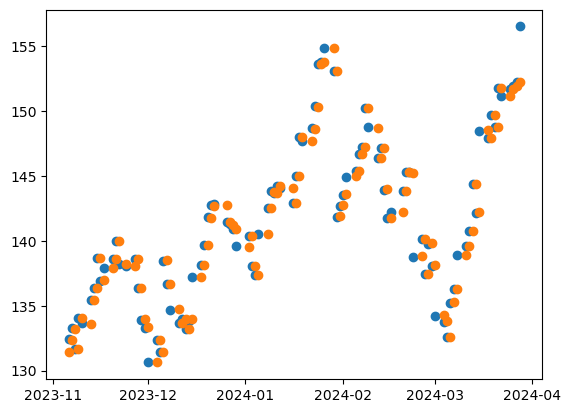

In [200]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=test.index,y=test['Tomorrow_Adj_close'])
plt.scatter(x=test.index,y=predictions)
plt.show()

It looks like the predictions 

#### Random Forests

We will be using a random forest regressor model to help us predict the future close price for the next day.

In [176]:
from sklearn.ensemble import RandomForestRegressor
#Instantiating the model
forest_model = RandomForestRegressor(n_estimators = 100, min_samples_split = 100, random_state = 1)

In [177]:
forest_model.fit(train[predictors], train["Tomorrow_Adj_close"])

RandomForestRegressor(min_samples_split=100, random_state=1)

In [178]:
#Getting the predictions from the forest model
forest_predictions = forest_model.predict(test[predictors])

In [185]:
#Turning the predictions into a series with the date index for easier interpretation
forest_predictions = pd.Series(forest_predictions,index = test.index)
forest_predictions

2024-03-28    142.689709
2024-03-27    142.689709
2024-03-26    142.689709
2024-03-25    142.689709
2024-03-22    142.689709
                 ...    
2023-11-10    136.095067
2023-11-09    129.811620
2023-11-08    135.615739
2023-11-07    130.237037
2023-11-06    129.811620
Length: 99, dtype: float64

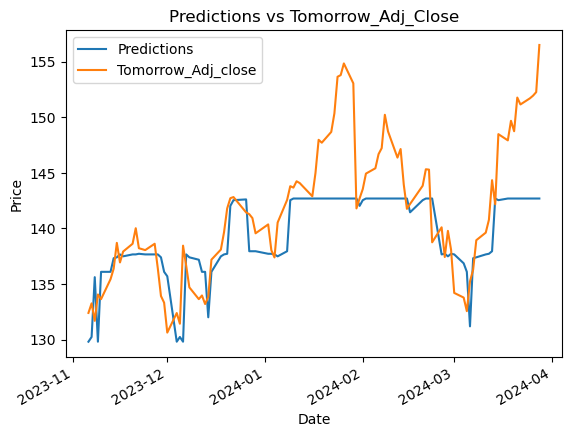

In [191]:
#Plotting the predictions and actual target values
plt.figure()
forest_predictions.plot(label = 'Predictions')
test['Tomorrow_Adj_close'].plot(label = 'Tomorrow_Adj_close')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Predictions vs Tomorrow_Adj_Close')
plt.show()

Obtaining the evaluation metrics for Random Forest. We will continue to use Mean Absolute Error and Mean Squared Error.

In [182]:
#Getting the mean absolute error and mean squared error 
forest_mae = mean_absolute_error(test['Target'], forest_predictions)
forest_mse = mean_squared_error(test['Target'],forest_predictions)
print(f"The mean absolute error is {forest_mae} and the mean squared error is {forest_mse}.")

The mean absolute error is 138.6184095198533 and the mean squared error is 19229.054350757164.


We will add the results to the report table and do a comparison for the evaulation metrics.

In [183]:
Report_df.loc[len(Report_df.index)] = ['Random Forest Regressor', 'MAE', forest_mae]
Report_df.loc[len(Report_df.index)] = ['Random Forest Regressor', 'MSE', forest_mse]

In [184]:
Report_df

,Model,Metrics,Result
0,Linear Regression,MAE,1.691710
1,Linear Regression,MSE,5.481171
2,Random Forest Regressor,MAE,138.618410
3,Random Forest Regressor,MSE,19229.054351


We can see that the Random Forest Regressor is a lot worse than the linear regression model. We may add more features improve the prediction capabilities of the model.